100%|██████████| 170M/170M [00:07<00:00, 23.8MB/s] 


Total samples in CIFAR-10 full training set: 50000
CIFAR-10 Class Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Class Distribution (Raw Counts):
  Class 0 (airplane): 5000 images
  Class 1 (automobile): 5000 images
  Class 2 (bird): 5000 images
  Class 3 (cat): 5000 images
  Class 4 (deer): 5000 images
  Class 5 (dog): 5000 images
  Class 6 (frog): 5000 images
  Class 7 (horse): 5000 images
  Class 8 (ship): 5000 images
  Class 9 (truck): 5000 images


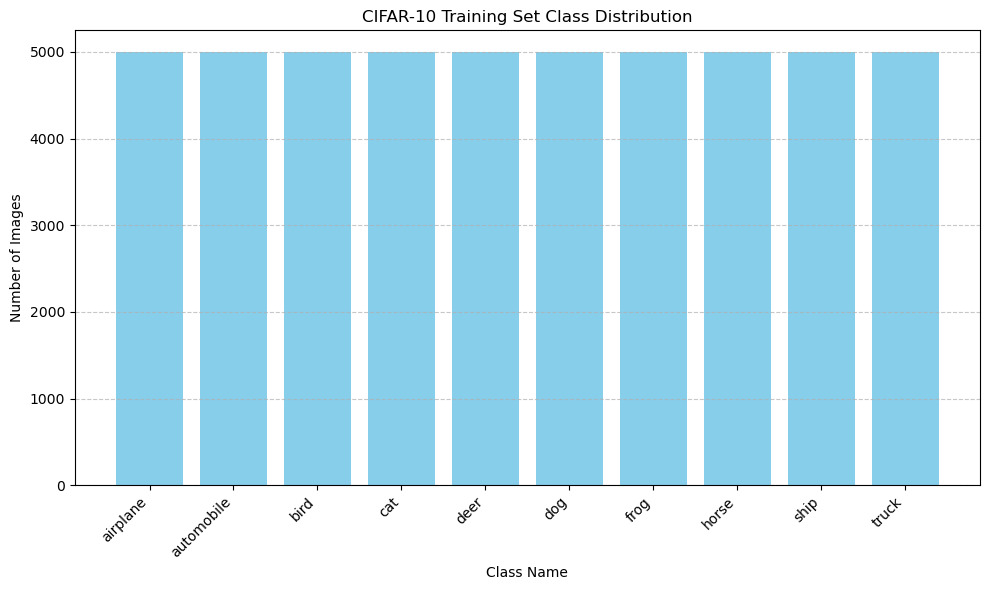


Class Distribution (Percentages):
  Class 0 (airplane): 10.00%
  Class 1 (automobile): 10.00%
  Class 2 (bird): 10.00%
  Class 3 (cat): 10.00%
  Class 4 (deer): 10.00%
  Class 5 (dog): 10.00%
  Class 6 (frog): 10.00%
  Class 7 (horse): 10.00%
  Class 8 (ship): 10.00%
  Class 9 (truck): 10.00%


In [2]:
import torch
from torchvision import datasets, transforms
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration (match your project's data_root if different) ---
DATA_ROOT = 'data' # This is where CIFAR-10 will be downloaded/loaded from

# --- Load the full CIFAR-10 Training Dataset ---
# We don't need complex transforms for just counting classes, ToTensor is enough.
transform = transforms.ToTensor()
full_train_dataset = datasets.CIFAR10(root=DATA_ROOT, train=True, download=True, transform=transform)

print(f"Total samples in CIFAR-10 full training set: {len(full_train_dataset)}")

# --- Get Class Labels ---
# CIFAR-10 provides class names. If not, you'd use integer labels.
cifar10_class_names = full_train_dataset.classes
print(f"CIFAR-10 Class Names: {cifar10_class_names}")

# --- Count Class Occurrences ---
# full_train_dataset.targets contains the class IDs for each image
class_counts = Counter(full_train_dataset.targets)

print("\nClass Distribution (Raw Counts):")
for class_id, count in sorted(class_counts.items()):
    class_name = cifar10_class_names[class_id]
    print(f"  Class {class_id} ({class_name}): {count} images")

# --- Visualize Class Distribution (Optional) ---
class_ids = sorted(class_counts.keys())
counts = [class_counts[i] for i in class_ids]

plt.figure(figsize=(10, 6))
plt.bar(cifar10_class_names, counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('CIFAR-10 Training Set Class Distribution')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Calculate Ratios (Optional) ---
total_images = len(full_train_dataset)
print("\nClass Distribution (Percentages):")
for class_id, count in sorted(class_counts.items()):
    class_name = cifar10_class_names[class_id]
    percentage = (count / total_images) * 100
    print(f"  Class {class_id} ({class_name}): {percentage:.2f}%")

In [6]:
import optuna
import os

# --- Configuration (Must match your original optuna_optimization.py settings) ---
# Ensure this path points to where your optuna_studies folder is
STUDY_STORAGE_BASE = "/home/2f39/Computer_Vision_Raj/optuna_studies"

# List the names of the optimizers you optimized
optimizers_to_recall = ["Adam", "AdamW", "SGD", "SGD_Momentum", "RMSprop"]

# Optional: CIFAR-10 Class Names (for better context if you saved any related metrics)
CIFAR10_CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


print(f"--- Recalling Best Parameters for Optimizers ---")

for opt_type in optimizers_to_recall:
    # Construct the study name and storage path for EACH optimizer's database
    study_name_for_db = f"cifar10_lenet_study_{opt_type}"
    storage_path = f"sqlite:///{os.path.join(STUDY_STORAGE_BASE, study_name_for_db)}.db"

    print(f"\nAttempting to load study '{study_name_for_db}' from storage: {storage_path}")

    try:
        # Load the existing study from the database
        study = optuna.load_study(
            study_name=study_name_for_db,
            storage=storage_path
        )

        print(f"Study '{opt_type}' loaded successfully! Number of finished trials: {len(study.trials)}")

        if study.best_trial:
            print(f"\n--- Best Trial Found for {opt_type} ---")
            print(f"  Trial number: {study.best_trial.number}")
            print(f"  Best Value (Validation Loss): {study.best_trial.value:.4f}")
            print("  Best Parameters:")
            for key, value in study.best_trial.params.items():
                print(f"    {key}: {value}")
            
            # Example of accessing user attributes if they were saved in the optimization script
            if "val_accuracies" in study.best_trial.user_attrs:
                # Assuming val_accuracies was saved as a list, get the last (final) value
                best_val_accuracy = study.best_trial.user_attrs["val_accuracies"][-1]
                print(f"  Best Validation Accuracy: {best_val_accuracy:.4f}")

            # You can also use study.best_params directly if you only need the parameters
            # print(f"Best Parameters (direct): {study.best_params}")
            
        else:
            print(f"No successful trials found for {opt_type} in study '{study_name_for_db}'.")

    except Exception as e:
        print(f"Error loading study for {opt_type}: {e}")
        print(f"Please ensure the database file '{study_name_for_db}.db' exists at '{STUDY_STORAGE_BASE}' and the study_name is correct.")

print("\n--- Finished Recalling All Best Parameters ---")

--- Recalling Best Parameters for Optimizers ---

Attempting to load study 'cifar10_lenet_study_Adam' from storage: sqlite:////home/2f39/Computer_Vision_Raj/optuna_studies/cifar10_lenet_study_Adam.db
Study 'Adam' loaded successfully! Number of finished trials: 10

--- Best Trial Found for Adam ---
  Trial number: 5
  Best Value (Validation Loss): 0.8649
  Best Parameters:
    lr: 0.00045443149691912926
    adam_beta1: 0.8896071534211415
    adam_beta2: 0.9900951753353078
    adam_eps: 2.601494535107454e-07
  Best Validation Accuracy: 0.7048

Attempting to load study 'cifar10_lenet_study_AdamW' from storage: sqlite:////home/2f39/Computer_Vision_Raj/optuna_studies/cifar10_lenet_study_AdamW.db
Study 'AdamW' loaded successfully! Number of finished trials: 10

--- Best Trial Found for AdamW ---
  Trial number: 7
  Best Value (Validation Loss): 0.8759
  Best Parameters:
    lr: 0.0015294334405757852
    adamw_beta1: 0.8857338434453298
    adamw_beta2: 0.9866173584306264
    adamw_eps: 8.2327

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib 

# Import the plotting function from your utils.py
# Make sure this script is run from the 'Computer_Vision_Raj' directory,
# or that 'utils.py' is in your Python path.
from utils import plot_combined_optimizer_metrics


BASE_DIR = "/home/2f39/Computer_Vision_Raj" 

CHECKPOINTS_DIR = os.path.join(BASE_DIR, "Checkpoints")
RUN_DATA_DIR = os.path.join(CHECKPOINTS_DIR, "run_data")
PLOTS_DIR = os.path.join(CHECKPOINTS_DIR, "plots") # This is where the combined plots will be saved

# Ensure the directory for combined plots exists
os.makedirs(PLOTS_DIR, exist_ok=True)

# List of optimizers whose history files you want to combine
optimizers_to_plot = ["Adam", "AdamW", "SGD", "RMSprop", "SGD_Momentum"] 

all_opt_data = {}

print(f"--- Loading training history files from: '{RUN_DATA_DIR}' ---")
for opt_name in optimizers_to_plot:
    history_file_path = os.path.join(RUN_DATA_DIR, f"{opt_name}_training_history.json")
    
    if os.path.exists(history_file_path):
        with open(history_file_path, 'r') as f:
            data = json.load(f)
            all_opt_data[opt_name] = data
        print(f"Loaded history for: {opt_name}")
    else:
        print(f"History file not found for '{opt_name}' at '{history_file_path}'. Skipping this optimizer.")

# --- Generate Combined Plots ---
if all_opt_data:
    print("\n--- Generating combined plots (Validation Loss & Validation Accuracy) ---")
    plot_combined_optimizer_metrics(all_opt_data, PLOTS_DIR)
    
    print("\nCombined plots generated successfully!")
    print(f"Check the '{PLOTS_DIR}' directory for the output images.")
else:
    print("No history data found or loaded for any optimizer. Cannot generate combined plots.")

--- Loading training history files from: '/home/2f39/Computer_Vision_Raj/Checkpoints/run_data' ---
Loaded history for: Adam
Loaded history for: AdamW
Loaded history for: SGD
Loaded history for: RMSprop
History file not found for 'SGDMomentum' at '/home/2f39/Computer_Vision_Raj/Checkpoints/run_data/SGDMomentum_training_history.json'. Skipping this optimizer.

--- Generating combined plots (Validation Loss & Validation Accuracy) ---
Combined validation loss plot saved to /home/2f39/Computer_Vision_Raj/Checkpoints/plots/combined_val_loss.png
Combined validation accuracy plot saved to /home/2f39/Computer_Vision_Raj/Checkpoints/plots/combined_val_accuracy.png

Combined plots generated successfully!
Check the '/home/2f39/Computer_Vision_Raj/Checkpoints/plots' directory for the output images.
